In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#load data

train_data=pd.read_csv('data/train.csv')
sample_submission=pd.read_csv('data/sampleSubmission.csv')
features_data=pd.read_csv('data/features.csv',parse_dates=True)
stores_data=pd.read_csv('data/stores.csv')
test_data=pd.read_csv('data/test.csv')

In [5]:
print(train_data.shape)
train_data.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
#structure of test data
#45 stores with 99 departments

print(test_data.shape)
test_data.head()

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
print(sample_submission.shape)
sample_submission.head()

(115064, 2)


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [8]:
#structure of features

print(features_data.shape)
features_data.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
print(stores_data.shape)
stores_data.head()


(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
#merging features with the other data

stores_features = features_data.merge(stores_data, how='inner', on='Store')
stores_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [11]:
#changing datatype of date

stores_features.Date = pd.to_datetime(stores_features.Date)
train_data.Date = pd.to_datetime(train_data.Date)
test_data.Date = pd.to_datetime(test_data.Date)

stores_features['Week'] = stores_features.Date.dt.week 
stores_features['Year'] = stores_features.Date.dt.year

<ipython-input-11-7d950b82239a>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  stores_features['Week'] = stores_features.Date.dt.week


In [12]:
#merging features to train and test data

train_features = train_data.merge(stores_features, how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

test_features = test_data.merge(stores_features, how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [13]:
# mark all NA values with 0
train_features['MarkDown1'].fillna(0, inplace=True)
train_features['MarkDown2'].fillna(0, inplace=True)
train_features['MarkDown3'].fillna(0, inplace=True)
train_features['MarkDown4'].fillna(0, inplace=True)
train_features['MarkDown5'].fillna(0, inplace=True)


test_features['MarkDown1'].fillna(0, inplace=True)
test_features['MarkDown2'].fillna(0, inplace=True)
test_features['MarkDown3'].fillna(0, inplace=True)
test_features['MarkDown4'].fillna(0, inplace=True)
test_features['MarkDown5'].fillna(0, inplace=True)


In [14]:
#changing the table structure

train_features = train_features[['Store', 'Dept', 'Date', 'Unemployment', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI','Week','Year', 'Weekly_Sales']]
test_features = test_features[['Store', 'Dept', 'Date', 'Unemployment', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI','Week','Year']]

In [15]:
#add a column "weekly sales" to test data
test_features['Weekly_Sales'] = np.zeros(len(test_features.Store))

In [16]:
train_features.head()

,Store,Dept,Date,Unemployment,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Week,Year,Weekly_Sales
0,1,1,2010-02-05,8.106,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,5,2010,24924.50
1,1,1,2010-02-12,8.106,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,6,2010,46039.49
2,1,1,2010-02-19,8.106,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,7,2010,41595.55
3,1,1,2010-02-26,8.106,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8,2010,19403.54
4,1,1,2010-03-05,8.106,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,9,2010,21827.90


In [17]:
test_features.head()

,Store,Dept,Date,Unemployment,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Week,Year,Weekly_Sales
0,1,1,2012-11-02,6.573,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,44,2012,0.0
1,1,1,2012-11-09,6.573,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,45,2012,0.0
2,1,1,2012-11-16,6.573,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,46,2012,0.0
3,1,1,2012-11-23,6.573,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,47,2012,0.0
4,1,1,2012-11-30,6.573,False,A,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,48,2012,0.0


In [18]:
# replace all string values with integers
train_features['IsHoliday'] = train_features['IsHoliday'].replace(False,0)
train_features['IsHoliday'] = train_features['IsHoliday'].replace(True,1)

train_features['Type'] = train_features['Type'].replace('A',1)
train_features['Type'] = train_features['Type'].replace('B',2)
train_features['Type'] = train_features['Type'].replace('C',3)


test_features['IsHoliday'] = test_features['IsHoliday'].replace(False,0)
test_features['IsHoliday'] = test_features['IsHoliday'].replace(True,1)

test_features['Type'] = test_features['Type'].replace('A',1)
test_features['Type'] = test_features['Type'].replace('B',2)
test_features['Type'] = test_features['Type'].replace('C',3)

In [19]:
# split train data in train(85%) and validation(15%) sets.
split_date = pd.datetime(2012,6,1)
train_set = train_features.loc[train_features['Date'] <= split_date]
val_set = train_features.loc[train_features['Date'] > split_date]
test_set=test_features

<ipython-input-19-50917d5fe6fe>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2012,6,1)


In [20]:
#set date as a index
train_set = train_set.set_index('Date')
val_set = val_set.set_index('Date')
test_set = test_set.set_index('Date')

In [21]:
# saving all sets as csv
train_set.to_csv('train_set_new.csv')
val_set.to_csv('val_set_new.csv')
test_set.to_csv('test_set_new.csv')

C:\Users\ocorovencova\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ocorovencova\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ocorovencova\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


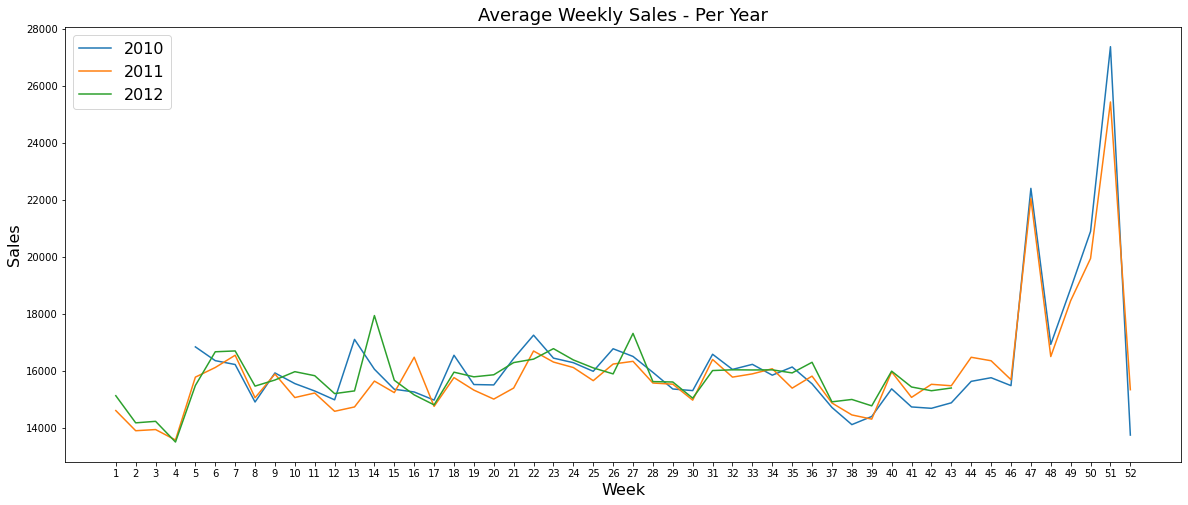

In [20]:
# plotting average weekly sales for all 3 years

weekly_sales_2010 = train_features[train_features.Year==2010]['Weekly_Sales'].groupby(train_features['Week']).mean()
weekly_sales_2011 = train_features[train_features.Year==2011]['Weekly_Sales'].groupby(train_features['Week']).mean()
weekly_sales_2012 = train_features[train_features.Year==2012]['Weekly_Sales'].groupby(train_features['Week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

C:\Users\ocorovencova\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


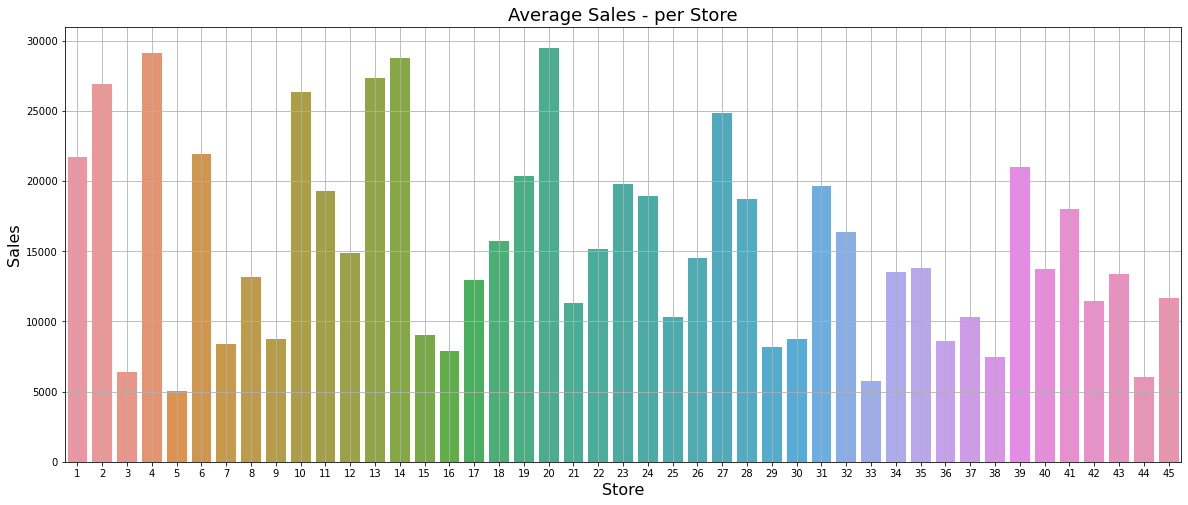

In [21]:
# plotting average weekly sales per 45 stores

weekly_sales = train_features['Weekly_Sales'].groupby(train_features['Store']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values)
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

In [ ]:
# plotting average weekly sales per 99 departments

weekly_sales_per_dept = train_features['Weekly_Sales'].groupby(train_features['Dept']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_sales_per_dept.index, weekly_sales_per_dept.values)
plt.grid()
plt.title('Average Sales - per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Correlationsmatrix')

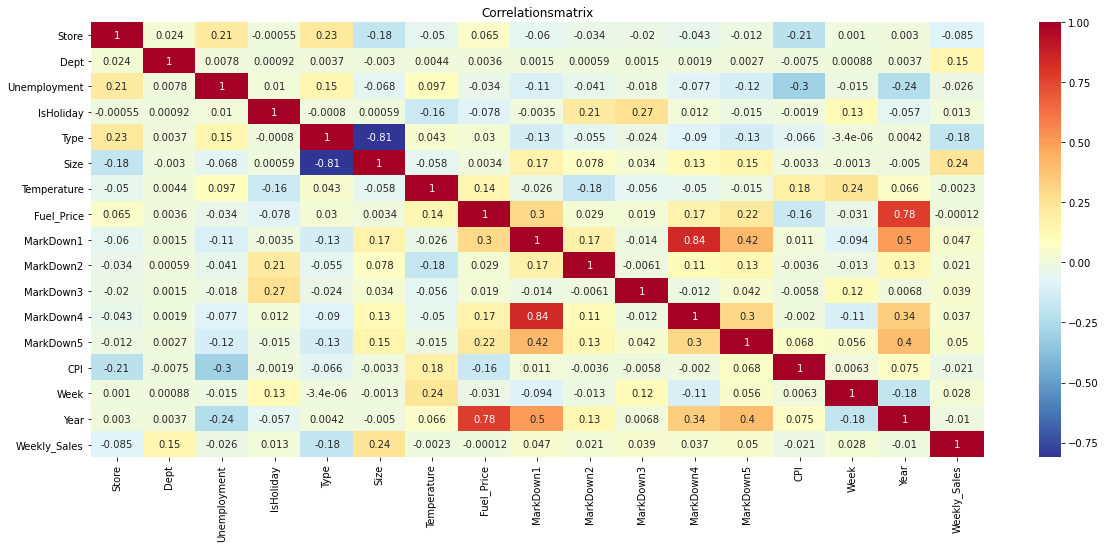

In [22]:
#the correlation matrix
corrs = train_features.corr()
plt.figure(figsize = (20, 8))
# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, annot = True)
plt.title('Correlationsmatrix')